In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pink_utils as pu
import scipy as sp
from scipy.ndimage import rotate 
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
transform = pu.transform('../Experiment/Experiment_F3W2_95_5/F3W2_95_5_Transform_Matrix.bin')
ed        = pu.heatmap('../Experiment/Experiment_F3W2_95_5/F3W2_95_5_ED_Matrix.bin')
som       = pu.som('../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6.bin')
images    = pu.image_binary('../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5.bin')
df        = pd.read_csv('../Experiment/Experiment_F3W2_95_5/FIRST_Cata_Images.csv')

df.shape

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(103929, 76)

In [3]:
print(SkyCoord(ra=df['radio.ra'][0]*u.degree, dec=df['radio.dec'][0]*u.degree, frame='icrs').ra)

206d24m37.3028s


/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


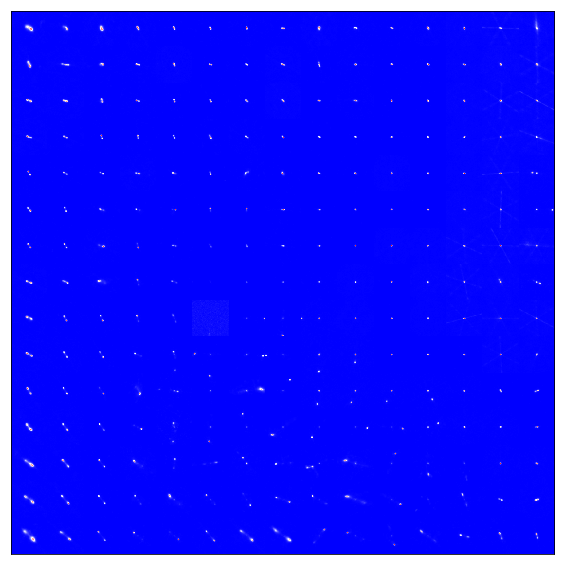

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.imshow(som.get_som(channel=0), cmap='bwr')

pu.no_ticks(ax)

fig.show()

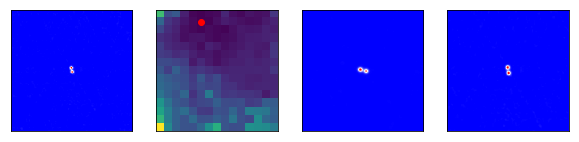

In [5]:
index = 100

def crop(img, inner_x, inner_y):
    y,x = img.shape
    start_x = x//2-(inner_x//2)
    start_y = y//2-(inner_y//2)    
    return img[start_y:start_y+inner_y,start_x:start_x+inner_x]



fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(10,3))

img = images.get_image(index=index, channel=0)
ax1.imshow(img, cmap='bwr')
pu.no_ticks(ax1)

hmap = ed.ed(index=index)
pos_min = np.unravel_index(np.argmin(hmap), hmap.shape)
ax2.imshow(hmap)
ax2.plot(pos_min[1], pos_min[0], 'ro')
pu.no_ticks(ax2)

neuron = som.get_neuron(x=pos_min[0], y=pos_min[1], channel=0)
ax3.imshow(neuron, cmap='bwr')
pu.no_ticks(ax3)

ax4.imshow(crop(img, neuron.shape[0], neuron.shape[1]), cmap='bwr')
pu.no_ticks(ax4)

fig.show()

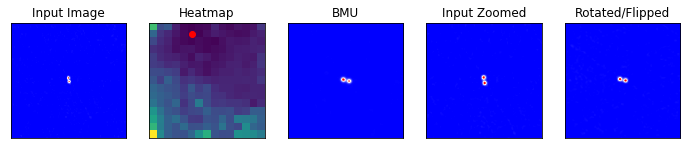

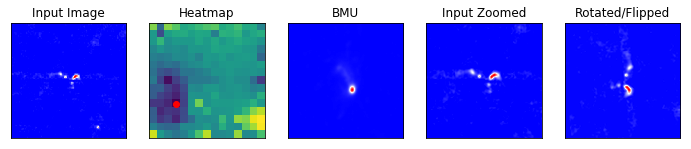

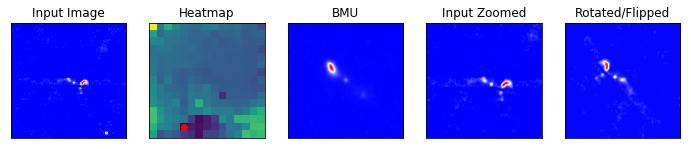

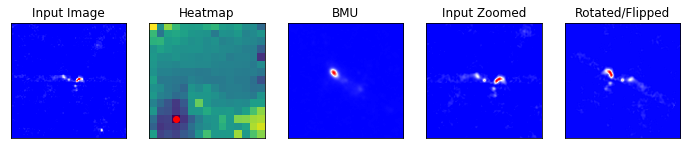

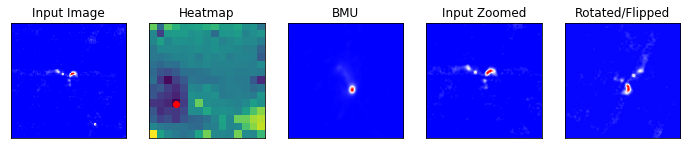

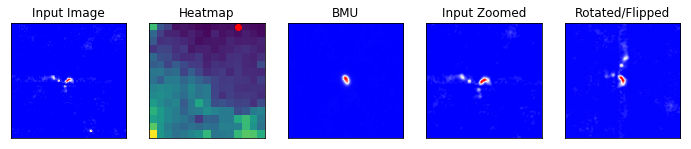

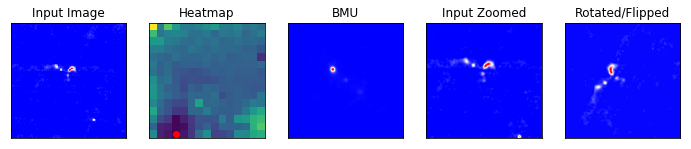

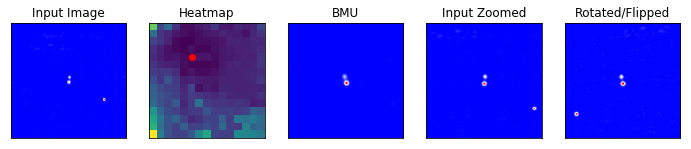

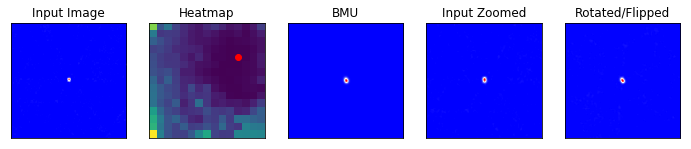

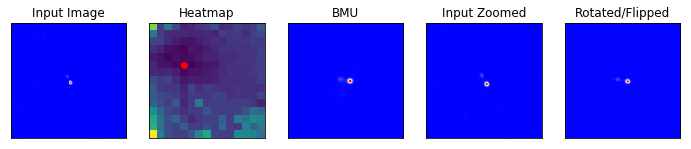

In [6]:
index = 100

def crop(img, inner_x, inner_y):
    y,x = img.shape
    start_x = x//2-(inner_x//2)
    start_y = y//2-(inner_y//2)    
    return img[start_y:start_y+inner_y,start_x:start_x+inner_x]

plt.close('all')

for index in [i for i in range(100 , 110)]:

    rot = transform.transform(index=index).reshape(transform.header_info[1:])

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(12,4))

    img = images.get_image(index=index, channel=0)
    ax1.imshow(img, cmap='bwr')
    ax1.set(title='Input Image')
    pu.no_ticks(ax1)

    hmap = ed.ed(index=index)
    pos_min = np.unravel_index(np.argmin(hmap), hmap.shape)
    ax2.imshow(hmap)
    ax2.plot(pos_min[1], pos_min[0], 'ro')
    ax2.set(title='Heatmap')
    pu.no_ticks(ax2)

    neuron = som.get_neuron(x=pos_min[0], y=pos_min[1], channel=0)
    ax3.imshow(neuron, cmap='bwr')
    ax3.set(title='BMU')
    pu.no_ticks(ax3)

    ax4.imshow(crop(img, neuron.shape[0], neuron.shape[1]), cmap='bwr')
    ax4.set(title='Input Zoomed')
    pu.no_ticks(ax4)

    flip, ro = rot[pos_min[1], pos_min[0]][0]

    crop_img = crop(img.T, neuron.shape[0], neuron.shape[1])

    crop_img = rotate(crop_img, -np.rad2deg(ro), reshape=False)
    if flip == 1:
#         print('Flipped')
        crop_img = crop_img[:,::-1]

#     print(ro, np.rad2deg(ro))
    ax5.imshow(crop_img, cmap='bwr')
    ax5.set(title='Rotated/Flipped')
    pu.no_ticks(ax5)

    fig.show()


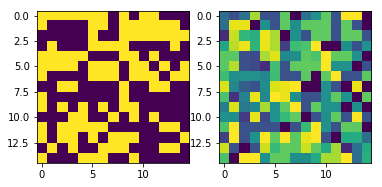

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(rot['flip'].reshape(hmap.shape))
ax2.imshow(rot['angle'].reshape(hmap.shape))


fig.show()

In [8]:
a,b = rot[2,2][0]

In [9]:
df.columns.tolist()

['Unnamed: 0',
 'catalog_id',
 'rgz_name',
 'zooniverse_id',
 'overedge',
 'radio.ra',
 'radio.dec',
 'consensus.ir_ra',
 'consensus.ir_dec',
 'consensus.n_total',
 'consensus.n_radio',
 'consensus.n_ir',
 'consensus.radio_level',
 'consensus.ir_level',
 'radio.number_components',
 'radio.number_peaks',
 'radio.max_angular_extent',
 'radio.total_solid_angle',
 'radio.outermost_level',
 'radio.max_physical_extent',
 'radio.total_cross_section',
 'component.peak_fluxes',
 'component.peak_flux_errs',
 'component.peak_ras',
 'component.peak_decs',
 'component.fluxes',
 'component.flux_errs',
 'component.angular_extents',
 'component.solid_angles',
 'component.physical_extents',
 'component.cross_sections',
 'radio.total_flux',
 'radio.total_flux_err',
 'radio.total_luminosity',
 'radio.total_luminosity_err',
 'AllWISE.designation',
 'AllWISE.ra',
 'AllWISE.dec',
 'AllWISE.w1mpro',
 'AllWISE.w1sigmpro',
 'AllWISE.w1snr',
 'AllWISE.w2mpro',
 'AllWISE.w2sigmpro',
 'AllWISE.w2snr',
 'AllWISE.w

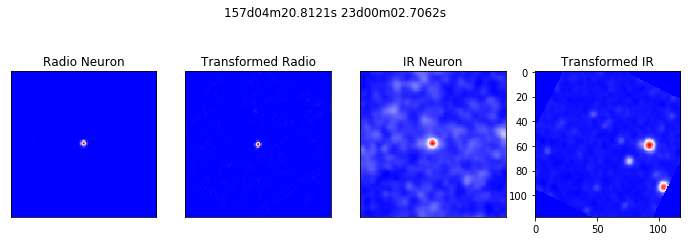

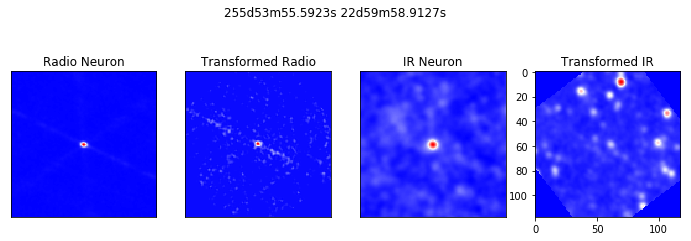

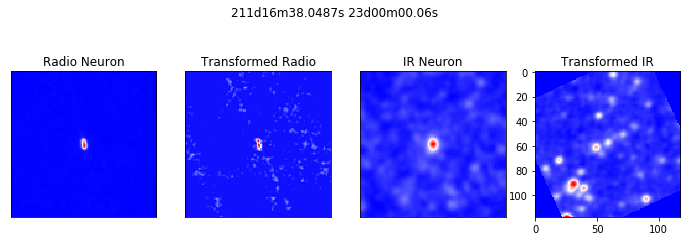

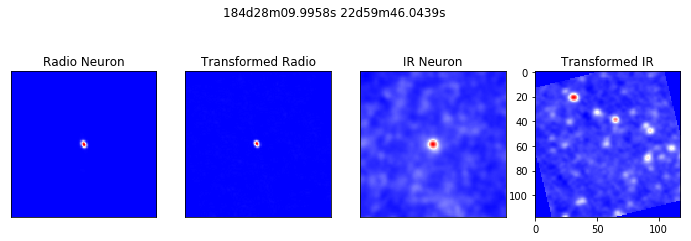

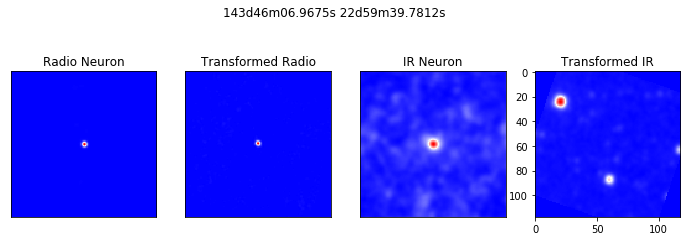

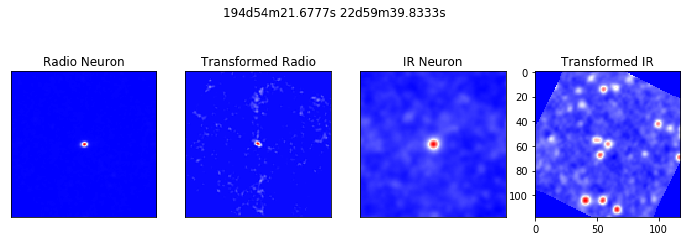

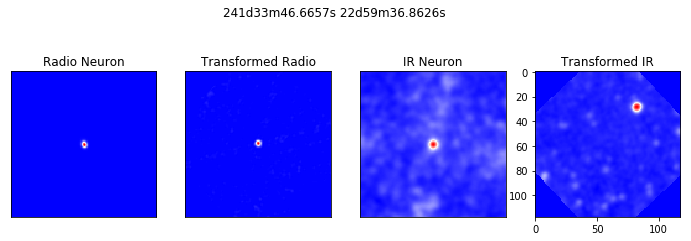

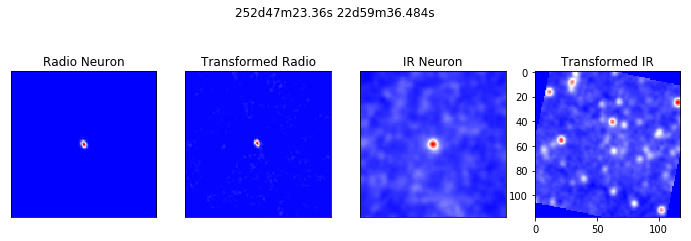

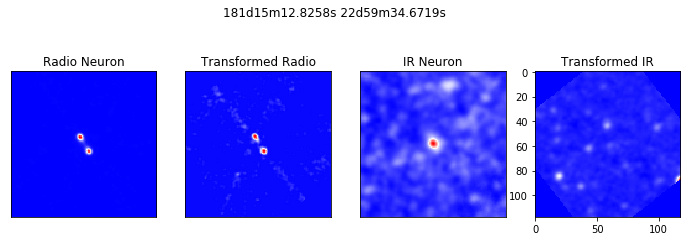

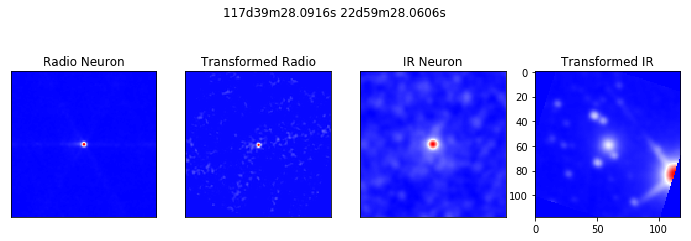

In [10]:
index = 100

def crop(img, inner_x, inner_y):
    y,x = img.shape
    start_x = x//2-(inner_x//2)
    start_y = y//2-(inner_y//2)    
    return img[start_y:start_y+inner_y,start_x:start_x+inner_x]

def return_transform(index, pos_min):
    rot = transform.transform(index=index).reshape(transform.header_info[1:])
    flip, ro = rot[pos_min[1], pos_min[0]][0]    

    return flip, ro
    
def apply_transform(index, pos_min, img, neuron):
    rot = transform.transform(index=index).reshape(transform.header_info[1:])
    flip, ro = rot[pos_min[1], pos_min[0]][0]

    crop_img = crop(img, neuron.shape[0], neuron.shape[1])

    crop_img = rotate(crop_img, -np.rad2deg(ro), reshape=False)
    if flip == 1:
        crop_img = crop_img[:,::-1]
            
    return crop_img


plt.close('all')
pix = 1.8*u.arcsecond

for index in range(1000, 1010):
    row = df.loc[index]
    sky_pos = SkyCoord(ra=row['radio.ra']*u.deg, dec=row['radio.dec']*u.deg, frame='icrs')
    wsky_pos = None
    if not row['consensus.ir_ra'] == -99:
        wsky_pos = SkyCoord(ra=row['consensus.ir_ra']*u.deg, dec=row['consensus.ir_dec']*u.deg, frame='icrs')
        dra, ddec = sky_pos.spherical_offsets_to(wsky_pos)
        dra = dra.to(u.arcsecond) / pix
        ddec = ddec.to(u.arcsecond) / pix
#         print(dra, ddec)
    
    img  = images.get_image(index=index, channel=0).T
    wimg = images.get_image(index=index, channel=1).T
    
    
    hmap = ed.ed(index=index)
    pos_min = np.unravel_index(np.argmin(hmap), hmap.shape)
    neuron = som.get_neuron(x=pos_min[0], y=pos_min[1], channel=0)
    wneuron = som.get_neuron(x=pos_min[0], y=pos_min[1], channel=1)
    
    crop_img  = crop(apply_transform(index, pos_min, img, neuron), 118, 118)
    wcrop_img = crop(apply_transform(index, pos_min, wimg, neuron), 118, 118)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,4))

    ax1.imshow(neuron, cmap='bwr')
    ax1.set(title='Radio Neuron')
    
    ax2.imshow(crop_img, cmap='bwr')
    ax2.set(title='Transformed Radio')
    
    ax3.imshow(wneuron, cmap='bwr')
    ax3.set(title='IR Neuron')
    
    ax4.imshow(wcrop_img, cmap='bwr')
    ax4.set(title='Transformed IR')
    
#     ax1.set(title=' '.join([f"{i:.2f}" for i in sky_pos.ra.hms]))
#     ax2.set(title=' '.join([f"{i:.2f}" for i in sky_pos.dec.dms]))
    
    for i in [ax1, ax2, ax3]:#, ax4]:
        pu.no_ticks(i)
    
    fig.suptitle(f"{str(sky_pos.ra)} {str(sky_pos.dec)}")
    fig.savefig(f'Images/Rotation_Test/{index}.pdf')